In [1]:
import pandas as pd
import numpy as np

In [66]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [67]:
def datasetStats(datasets, path):
    dsUniqueVals=[]
    dsUniqueValsNum=[]
    rows=[]
    for dataset in datasets:

        df = pd.read_csv(path.format(dataset))
        ds_numeric = df.select_dtypes(include='number')
        dsUniqueVals.append(sum(df.nunique()))
        dsUniqueValsNum.append(sum(ds_numeric.nunique()))
        rows.append(len(df.index))                                                                                        
    return(pd.DataFrame({"dataset":datasets,"rows":rows,"dsUniqueVals":dsUniqueVals,"dsUniqueValsNum":dsUniqueValsNum}))

In [68]:
def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)

In [69]:
def generatePlot2(series,scale,datasets, savefigpath, XaxisDataSize=False,doNotPlotAccAndModelSize=False,
                  doNotPlotRows=False, hideLegend=False, hideUniq=False, 
                  ylimacc = None, ylimtime = None,ylimvals =None, saveAsPNGtoEaseCropping=False, legendOffset=(-0.08, 1), legendNcol=6):
    for serie in series:
        serie["df"] = pd.read_csv(serie["path"])
        serie["df"]=serie["df"][serie["df"].dataset.isin(datasets)]
        serie["df"]["modelsize"]=serie["df"].rules*serie["df"].antlength
    
    _datasets = series[0]["df"].dataset
    dsStats = stats[stats.dataset.isin(_datasets)]
    dsStats=dsStats.sort_values(by=["dsUniqueValsNum"])
    
    if XaxisDataSize:
        for serie in series:
            serie["df"].dataset=serie["df"].dataset.str.replace("kdd","").str.replace("_","")
        dsStats.dataset=dsStats.dataset.str.replace("kdd","").str.replace("_","")
        XaxisLabel="row count"
    else:
        XaxisLabel="dataset"
    xAxOrd= dsStats.dataset
    for serie in series:
        serie["df"].set_index("dataset").loc[xAxOrd]
        serie["df"]=serie["df"].set_index("dataset").loc[xAxOrd]
    #series[0]["df"]=series[0]["df"].set_index("dataset").loc[xAxOrd]

    fig1 = plt.gcf()
    fig, ax0 = plt.subplots()
    fig.subplots_adjust(right=0.75)
    fig.set_size_inches(8, 4)
    plt.xlabel(XaxisLabel)
    if not doNotPlotAccAndModelSize:
        plt.ylabel("accuracy")
    plt.xticks(rotation=90)
    ax1 = ax0.twinx()
    ax0.set_yscale('log')
    
    ax2 = ax0.twinx()
    ax3 = ax0.twinx()
    #ax2.set_yscale('log')
    ax2.spines['right'].set_position(("axes", 1.))
    
    ax1.spines["left"].set_position(("axes", -0.2)) # red one
    ax1.spines["left"].set_visible(True)
    ax1.yaxis.set_label_position('left')
    ax1.yaxis.set_ticks_position('left')

    ax3.spines['right'].set_position(("axes", 1.2))
    for serie in series:
        if not doNotPlotAccAndModelSize:
            ax1.scatter(serie["df"].index, serie["df"]['accuracy'],s=serie["df"]['modelsize']*scale, marker=serie["marker"], label=serie["label"] + ' (acc)', alpha=0.5)
        ax0.plot(serie["df"].index,  serie["df"]['buildtime'], label=serie["label"] + ' (s)', alpha=0.5,linestyle=serie["linestyle"],marker=serie["markerline"])
    
    rowcolor="green"
    uniqColor="violet"
    ax2.plot(dsStats['dataset'],  dsStats["dsUniqueValsNum"],  alpha=0.5,linestyle="dashdot", color=uniqColor, label='unique values')
    if not doNotPlotRows:
        ax3.plot(dsStats['dataset'],  dsStats["rows"], alpha=0.5,linestyle="dotted", color=rowcolor, label='rows')
    ax2.yaxis.label.set_color(uniqColor)
    tkw = dict(size = 4, width = 1.5)
    ax2.tick_params(axis='y', colors=uniqColor, **tkw)
    ax3.yaxis.label.set_color(rowcolor)
    ax3.tick_params(axis='y', colors=rowcolor, **tkw)
    # bbox_to_anchor=(0.1, -0.2) below figure
    
    if not hideLegend:
        legend=[]
        plt.figlegend(loc='upper left',ncol=legendNcol, 
                      bbox_to_anchor=legendOffset)
    ax0.set_ylabel("learning time [s]")
    if not doNotPlotAccAndModelSize:
        ax1.set_ylabel("accuracy")
    ax2.set_ylabel("unique numeric values in dataset")
    ax3.set_ylabel("rows in training dataset")
    if doNotPlotAccAndModelSize:
        ax1.axes.get_yaxis().set_visible(False)
        #ax0.axes.get_xaxis().set_visible(False)

    if hideUniq:
        ax2.axes.get_xaxis().set_visible(False)
        ax2.axes.get_yaxis().set_visible(False)
    if doNotPlotRows:
        ax3.axes.get_xaxis().set_visible(False)
        ax3.axes.get_yaxis().set_visible(False)
    if ylimacc != None:
        ax1.set_ylim(ylimacc)
    if ylimtime != None:
        ax0.set_ylim(ylimtime)   
    if ylimvals != None:
        ax2.set_ylim(ylimvals)          
        
    if savefigpath != None:   
        plt.margins(0,0)
        if saveAsPNGtoEaseCropping:
            form="png"
        else:
            form="pdf"
        plt.savefig(savefigpath, format=form,dpi=300,bbox_inches='tight',pad_inches = 0) 
    plt.show()
    plt.draw()

series=[
    {"path":"CBA_results/server/117-noExtend-D-mci=-1-cba.csv","label":"CBA","marker":"H","linestyle":"-","markerline":"."},
    {"path":"CBA_results/server/120-noExtend-mci=-1-qcba.csv","label":"refit","marker":",","linestyle":"--","markerline":"^"},
    {"path":"CBA_results/server/42-noExtend-T-A-mci=-1-qcba.csv","label":"trimming","marker":"h","linestyle":"--","markerline":"<"},
    {"path":"CBA_results/server/186-numericOnly-T-A-mci=0-qcba.csv","label":"extension (minCI=0)","marker":"h","linestyle":"--","markerline":">"},   
    {"path":"CBA_results/server/186-numericOnly-T-A-mci=-1-qcba.csv","label":"extension (minCI=-1)","marker":"h","linestyle":"--","markerline":"s"},
    {"path":"CBA_results/server/198-numericOnly-T-Pcba-A-mci=0-qcba.csv","label":"postpruning (minCI=0)","marker":"h","linestyle":"--","markerline":"p"},
    {"path":"CBA_results/server/196-numericOnly-T-Pcba-A-transactionBased-mci=0-qcba.csv","label":"transaction based (minCI=0)","marker":"h","linestyle":"--","markerline":"D"},    
]
savefigpath="CBA_results/server/KDDablation.pdf"


# Compute dataset metadata

In [70]:
path = "data/datasets/{}.csv"
pathDisc = "data/folds_discr2/train/{}0.csv"
datasets = ["iris","australian","anneal","autos","breast-w","colic","credit-a","credit-g","diabetes","glass","heart-statlog","ionosphere","labor","letter","lymph","segment","sonar","vehicle","vowel","hepatitis","spambase","hypothyroid","kdd1000_","kdd10000_","kdd20000_","kdd30000_","kdd40000_","kdd50000_","kddfull"]    
stats=datasetStats(datasets,path)
stats

,dataset,rows,dsUniqueVals,dsUniqueValsNum
0,iris,150,126,123
1,australian,690,1169,1169
2,anneal,898,221,178
3,autos,205,986,926
4,breast-w,699,91,89
5,colic,368,397,340
6,credit-a,690,1171,1129
7,credit-g,1000,1077,1021
8,diabetes,768,1256,1254
9,glass,214,945,939


# Evaluation on all datasets except KDD

In [71]:
datasets = ["iris","australian","anneal","autos","breast-w","colic","credit-a","credit-g","diabetes","glass","heart-statlog","ionosphere","labor","letter","lymph","segment","sonar","vehicle","vowel","hepatitis","spambase","hypothyroid"]


## SBRL + QCBA 5

<Figure size 432x288 with 0 Axes>

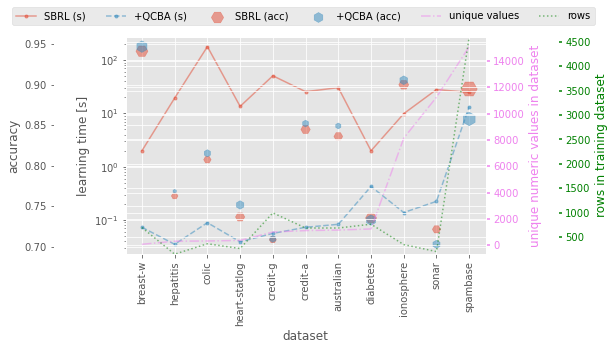

<Figure size 432x288 with 0 Axes>

In [72]:
pathQCBA="SBRL_results/SBRLQCBA-noPruning-Long.csv"
pathBASE="SBRL_results/SBRL-Long.csv"
savefigpath="SBRL_results/SBRLQCBA-noPruning-Long.pdf"
scale=20
#generatePlot(pathQCBA,pathBASE,scale,datasets, savefigpath,"SBRL")
series=[
    {"path":pathBASE,"label":"SBRL","marker":"H","linestyle":"-","markerline":"."},
    {"path":pathQCBA,"label":"+QCBA","marker":"h","linestyle":"--","markerline":"."}
]
generatePlot2(series,scale,datasets, savefigpath)


## SBRL + QCBA 6

<Figure size 432x288 with 0 Axes>

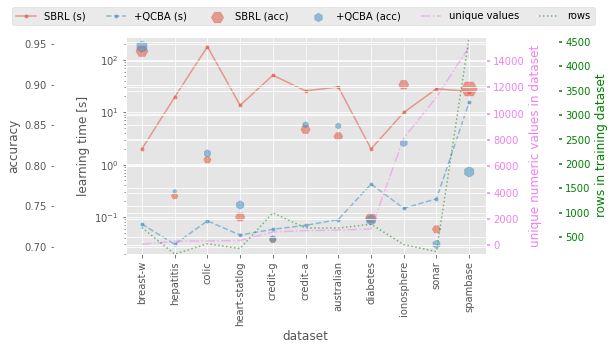

<Figure size 432x288 with 0 Axes>

In [73]:
pathQCBA="SBRL_results/SBRLQCBA-transactionBased-Long.csv"
pathBASE="SBRL_results/SBRL-Long.csv"
savefigpath="SBRL_results/SBRLQCBA-transactionBased-Long.pdf"
scale=20 
series=[
    {"path":pathBASE,"label":"SBRL","marker":"H","linestyle":"-","markerline":"."},
    {"path":pathQCBA,"label":"+QCBA","marker":"h","linestyle":"--","markerline":"."}
]
generatePlot2(series,scale,datasets, savefigpath)

## CBA + QCBA # 5

<Figure size 432x288 with 0 Axes>

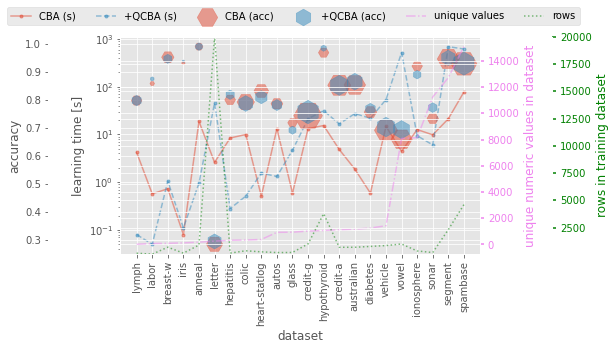

<Figure size 432x288 with 0 Axes>

In [74]:
pathQCBA="CBA_results/198-numericOnly-T-Pcba-A-mci=-1-qcba.csv"
pathBASE="CBA_results/198-numericOnly-T-Pcba-A-mci=-1-cba.csv"
savefigpath="CBA_results/CBA_QCBA_198-numericOnly-T-Pcba-A-mci=-1.pdf"
scale=1
series=[
    {"path":pathBASE,"label":"CBA","marker":"H","linestyle":"-","markerline":"."},
    {"path":pathQCBA,"label":"+QCBA","marker":"h","linestyle":"--","markerline":"."}
]
generatePlot2(series,scale,datasets, savefigpath)

## CBA + QCBA # 6

<Figure size 432x288 with 0 Axes>

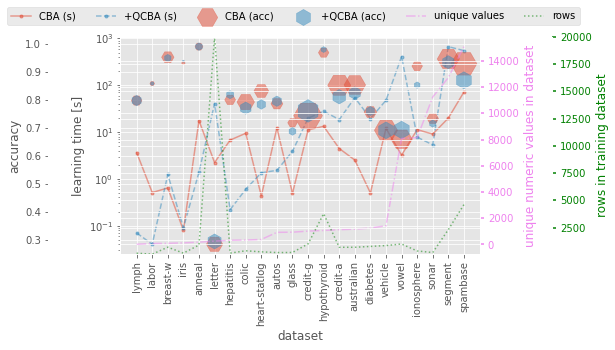

<Figure size 432x288 with 0 Axes>

In [75]:
pathQCBA="CBA_results/196-numericOnly-T-Pcba-A-transactionBased-mci=-1-qcba.csv"
pathBASE="CBA_results/196-numericOnly-T-Pcba-A-transactionBased-mci=-1-cba.csv"
savefigpath="CBA_results/CBA_QCBA_196-numericOnly-T-Pcba-A-transactionBased-mci=-1.pdf"
scale=1
series=[
    {"path":pathBASE,"label":"CBA","marker":"H","linestyle":"-","markerline":"."},
    {"path":pathQCBA,"label":"+QCBA","marker":"h","linestyle":"--","markerline":"."}
]
generatePlot2(series,scale,datasets, savefigpath)

## IDS + QCBA #5

<Figure size 432x288 with 0 Axes>

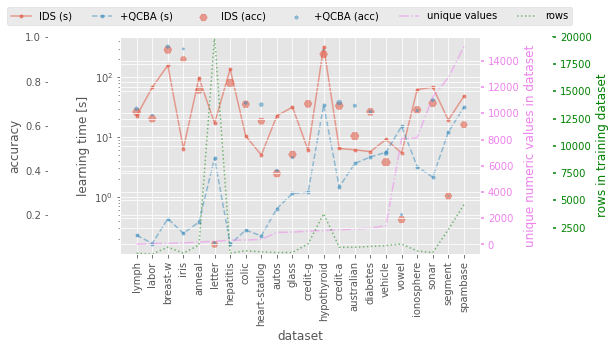

<Figure size 432x288 with 0 Axes>

In [76]:
pathQCBA="IDS_results/IDSQCBA_R_noPruning_ATTPRUNING_TRUE.csv"
pathBASE="IDS_results/IDS.csv"
savefigpath="IDS_results/IDSQCBA_R_noPruning_ATTPRUNING_TRUE.pdf"
scale=1
series=[
    {"path":pathBASE,"label":"IDS","marker":"H","linestyle":"-","markerline":"."},
    {"path":pathQCBA,"label":"+QCBA","marker":"h","linestyle":"--","markerline":"."}
]
generatePlot2(series,scale,datasets, savefigpath)

## IDS + QCBA #6

<Figure size 432x288 with 0 Axes>

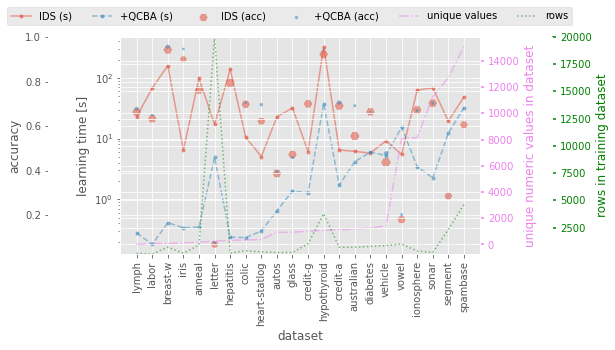

<Figure size 432x288 with 0 Axes>

In [77]:
pathQCBA="IDS_results/IDSQCBA_R_transactionBased_ATTPRUNING_TRUE.csv"
pathBASE="IDS_results/IDS.csv"
savefigpath="IDS_results/IDSQCBA_R_transactionBased_ATTPRUNING_TRUE.pdf"
scale=1
series=[
    {"path":pathBASE,"label":"IDS","marker":"H","linestyle":"-","markerline":"."},
    {"path":pathQCBA,"label":"+QCBA","marker":"h","linestyle":"--","markerline":"."}
]
generatePlot2(series,scale,datasets, savefigpath)

# KDD dataset

In [78]:
datasets = ["kdd1000_","kdd10000_","kdd20000_","kdd30000_","kdd40000_"]
yAXISRangeForKDDMultiPlots=[0.75,1]
ylimvals = (0,50000)
ylimtime=(0.1,100000)
ylimacc=(0.7,1)
legendNcol=3
legendOffset=(+0.15, 1.05)

## CBA

### effect of minimum conditional improvement (mci)

note that these results were comon a different machine (server) in filename

### CBA + QCBA #5 mci=-1

<Figure size 432x288 with 0 Axes>

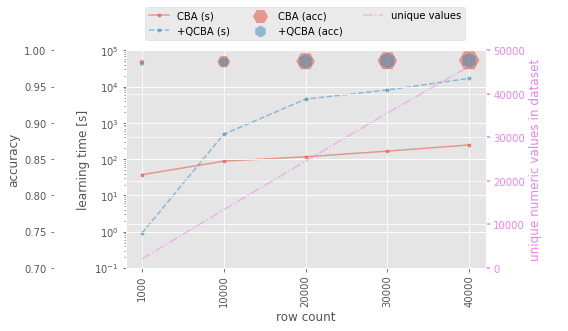

<Figure size 432x288 with 0 Axes>

In [79]:
pathQCBA="CBA_results/server/198-numericOnly-T-Pcba-A-mci=-1-qcba.csv"
pathBASE="CBA_results/server/198-numericOnly-T-Pcba-A-mci=-1-cba.csv"
savefigpath="CBA_results/server/KDD_CBA_QCBA_198-numericOnly-T-Pcba-A-mci=-1.pdf"

scale=2

series=[
    {"path":pathBASE,"label":"CBA","marker":"H","linestyle":"-","markerline":"."},
    {"path":pathQCBA,"label":"+QCBA","marker":"h","linestyle":"--","markerline":"."}
]
generatePlot2(series,scale,datasets, savefigpath,XaxisDataSize=True,ylimvals=ylimvals,doNotPlotRows=True,ylimtime=ylimtime,ylimacc=ylimacc,legendNcol=legendNcol,legendOffset=legendOffset)



### CBA + QCBA #5 mci=0

<Figure size 432x288 with 0 Axes>

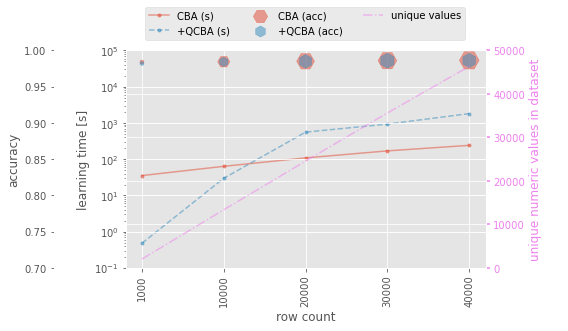

<Figure size 432x288 with 0 Axes>

In [80]:
pathQCBA="CBA_results/server/198-numericOnly-T-Pcba-A-mci=0-qcba.csv"
pathBASE="CBA_results/server/198-numericOnly-T-Pcba-A-mci=0-cba.csv"
savefigpath="CBA_results/server/KDD_CBA_QCBA_198-numericOnly-T-Pcba-A-mci=0.pdf"

series=[
    {"path":pathBASE,"label":"CBA","marker":"H","linestyle":"-","markerline":"."},
    {"path":pathQCBA,"label":"+QCBA","marker":"h","linestyle":"--","markerline":"."}
]
generatePlot2(series,scale,datasets, savefigpath,XaxisDataSize=True,ylimvals=ylimvals,doNotPlotRows=True,ylimtime=ylimtime,ylimacc=ylimacc,legendNcol=legendNcol,legendOffset=legendOffset)

**RESULT**: Version with MCI = 0 is faster and there is negligible performance difference

##  CBA + QCBA #6 mci=0

<Figure size 432x288 with 0 Axes>

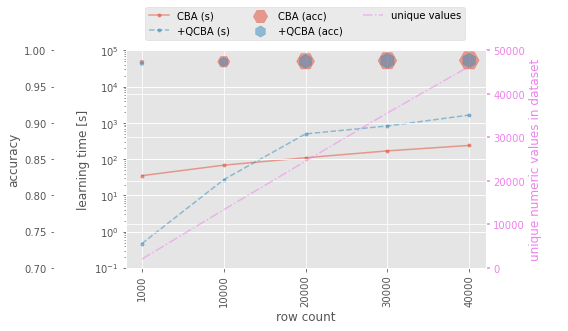

<Figure size 432x288 with 0 Axes>

In [81]:
pathQCBA="CBA_results/server/196-numericOnly-T-Pcba-A-transactionBased-mci=0-qcba.csv"
pathBASE="CBA_results/server/196-numericOnly-T-Pcba-A-transactionBased-mci=0-cba.csv"
savefigpath="CBA_results/server/KDD_CBA_QCBA-196-numericOnly-T-Pcba-A-transactionBased-mci=0.pdf"
series=[
    {"path":pathBASE,"label":"CBA","marker":"H","linestyle":"-","markerline":"."},
    {"path":pathQCBA,"label":"+QCBA","marker":"h","linestyle":"--","markerline":"."}
]
generatePlot2(series,scale,datasets, savefigpath,XaxisDataSize=True,doNotPlotRows=True,ylimvals=ylimvals,ylimtime=ylimtime,ylimacc=ylimacc,legendNcol=legendNcol,legendOffset=legendOffset)

**RESULT**: There is a small difference between 5 and 6

## Effect of individual steps

In [82]:
pathQCBA

'CBA_results/server/196-numericOnly-T-Pcba-A-transactionBased-mci=0-qcba.csv'

<Figure size 432x288 with 0 Axes>

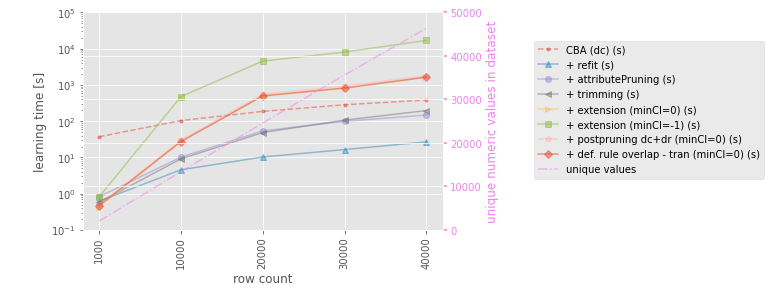

<Figure size 432x288 with 0 Axes>

In [92]:
series=[
    {"path":"CBA_results/server/120-noExtend-mci=-1-cba.csv","label":"CBA (dc)","marker":"H","linestyle":"--","markerline":"."},

#    {"path":"CBA_results/server/117-noExtend-D-mci=-1-cba.csv","label":"CBA","marker":"H","linestyle":"--","markerline":"."},
    {"path":"CBA_results/server/120-noExtend-mci=-1-qcba.csv","label":"+ refit","marker":",","linestyle":"-","markerline":"^"},
    {"path":"CBA_results/server/114-noExtend-A-mci=-1-qcba.csv","label":"+ attributePruning","marker":"h","linestyle":"-","markerline":"o"},    
    {"path":"CBA_results/server/42-noExtend-T-A-mci=-1-qcba.csv","label":"+ trimming","marker":"h","linestyle":"-","markerline":"<"},
    
    {"path":"CBA_results/server/186-numericOnly-T-A-mci=0-qcba.csv","label":"+ extension (minCI=0)","marker":"h","linestyle":"-","markerline":">"},   
    {"path":"CBA_results/server/186-numericOnly-T-A-mci=-1-qcba.csv","label":"+ extension (minCI=-1)","marker":"h","linestyle":"-","markerline":"s"},
    {"path":"CBA_results/server/198-numericOnly-T-Pcba-A-mci=0-qcba.csv","label":"+ postpruning dc+dr (minCI=0)","marker":"h","linestyle":"-","markerline":"p"},
    {"path":"CBA_results/server/196-numericOnly-T-Pcba-A-transactionBased-mci=0-qcba.csv","label":"+ def. rule overlap - tran (minCI=0)","marker":"h","linestyle":"-","markerline":"D"},    
]
savefigpath="CBA_results/server/KDDablationTime.pdf"
generatePlot2(series,scale,datasets,savefigpath, True,doNotPlotRows=True,doNotPlotAccAndModelSize=True,legendNcol=1,legendOffset=(0.9, 0.8),ylimvals=ylimvals,ylimtime=ylimtime)

# SBRL + QCBA

### SBRL trained on long rules with QCBA#5

<Figure size 432x288 with 0 Axes>

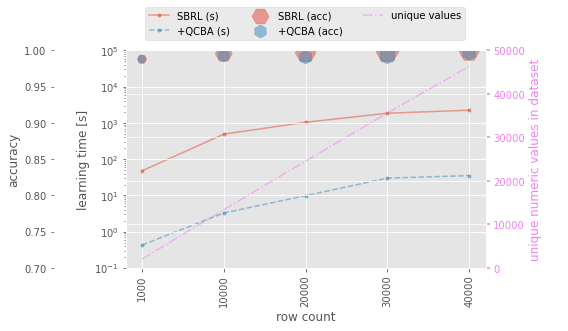

<Figure size 432x288 with 0 Axes>

In [94]:
pathBASE="SBRL_results/server/SBRL-noPruning-Long_mci0.csv" #SBRLQCBA-transactionBased-Long.csv
pathQCBA="SBRL_results/server/SBRLQCBA-noPruning-Long_mci0.csv" #SBRLQCBA-noPruning-Long_mci0.csv SBRL-transactionBased-Long.csv
savefigpath="SBRL_results/server/KDD-SBRL-noPruning-Long.pdf"
scale=20
series=[
    {"path":pathBASE,"label":"SBRL","marker":"H","linestyle":"-","markerline":"."},
    {"path":pathQCBA,"label":"+QCBA","marker":"h","linestyle":"--","markerline":"."}
]
generatePlot2(series,scale,datasets, savefigpath,XaxisDataSize=True,doNotPlotRows=True,ylimtime=ylimtime,ylimacc=ylimacc,ylimvals=ylimvals,legendNcol=legendNcol,legendOffset=legendOffset)

# IDS

## IDS+QCBA#5

<Figure size 432x288 with 0 Axes>

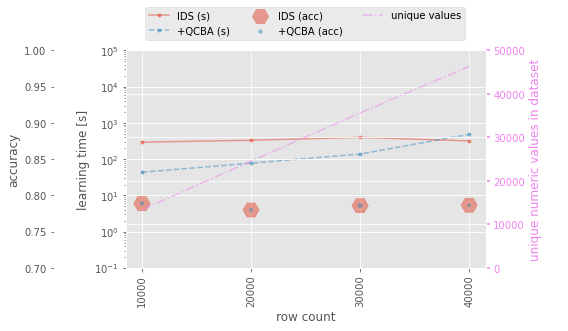

<Figure size 432x288 with 0 Axes>

In [95]:
pathQCBA="IDS_results/server/IDSQCBA_R_noPruning_ATTPRUNING_TRUE_mci0.csv" #IDSQCBA_R_transactionBased_ATTPRUNING_TRUE.csv
pathBASE="IDS_results/server/IDS.csv"#IDS.csv
savefigpath="IDS_results/server/KDD-IDSQCBA_R_noPruning_ATTPRUNING_TRUE.pdf"
scale=5
series=[
    {"path":pathBASE,"label":"IDS","marker":"H","linestyle":"-","markerline":"."},
    {"path":pathQCBA,"label":"+QCBA","marker":"h","linestyle":"--","markerline":"."}
]
generatePlot2(series,scale,datasets, savefigpath,XaxisDataSize=True,doNotPlotRows=True,ylimtime=ylimtime,ylimacc=ylimacc,ylimvals=ylimvals,legendNcol=legendNcol,legendOffset=legendOffset)
